In [5]:
import pandas as pd
import numpy as np

## Data Load and Extract

In [6]:
res_df = pd.read_csv('./multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
res_df.shape

(16716, 228)

In [7]:
res_df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
res_df[['Age','Country']].head()

,Age,Country
0,NaN,NaN
1,30.0,United States
2,28.0,Canada
3,56.0,United States
4,38.0,Taiwan


In [9]:
res_df.where(res_df['Age'] > 50).iloc[:5,:3]

,GenderSelect,Country,Age
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,Male,United States,56.0
4,NaN,NaN,NaN


# Data Manipulation

### Extract Top 12 Countries having large mount of data  
- groupby(), count()
- sort_values() 
- set_index()
- difference() : of index
- drop() : by indexes 

In [10]:
# DataFrameGroupBy object
groupby_country = res_df.groupby('Country')
groupby_country

In [11]:
# Count the number of rows that have value (not NaN)
groupby_country.count().iloc[:3,:4]

,GenderSelect,Age,EmploymentStatus,StudentStatus
Country,,,,
Argentina,92,92,92,3
Australia,421,409,421,23
Belarus,54,54,54,2


In [12]:
# Fill NaN in 'Age' by mean value
res_df['Age'].fillna(res_df['Age'].mean()).head()

0    32.372841
1    30.000000
2    28.000000
3    56.000000
4    38.000000
Name: Age, dtype: float64

In [13]:
# create copy table with 'Age' and 'Country' columns (Country becomes index)
count_df = res_df[['Country', 'Age']].copy()

# replace NaN in 'Age' by mean value 
count_df['Age'] = count_df['Age'].fillna(count_df['Age'].mean())

# Count the number of rows that have value (not NaN)
groupby_country = count_df.groupby('Country')
groupby_country_count = groupby_country.count()

groupby_country_count.head()

,Age
Country,
Argentina,92
Australia,421
Belarus,54
Belgium,91
Brazil,465


In [14]:
# sort by count in 'Age' column - countries having more data 
groupby_country_count.sort_values('Age', ascending=False).head()

,Age
Country,
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535


In [15]:
# drop 'Other' in 'Country' 
drop_other = groupby_country_count.drop('Other')
drop_other.sort_values('Age',ascending=False).head()

,Age
Country,
United States,4197
India,2704
Russia,578
United Kingdom,535
People 's Republic of China,471


In [16]:
# top 12 countries (having more data)
# keep only indexes
top12_countries = drop_other.sort_values('Age',ascending=False).index[:12]
top12_countries

Index(['United States', 'India', 'Russia', 'United Kingdom',
       'People 's Republic of China', 'Brazil', 'Germany', 'France', 'Canada',
       'Australia', 'Spain', 'Japan'],
      dtype='object', name='Country')

In [17]:
# From original data 'res_df', extract top 12 countries only 

# Set 'Country' as index to res_df (inplace=True = overwrite original)
# Here, changed from book not to break original DataFarme
res_df2 = res_df.set_index('Country', inplace=False)

# Exclude indexes of top12 countries as indexes of "drop countries'
drop_countries = res_df2.index.difference(top12_countries)

# Drop top 12 countries 
res_df_top12 = res_df2.drop(drop_countries, inplace=False)
res_df_top12.shape

(11310, 227)

In [18]:
# Make sure top 12 countries are extracted (not sorted, though)
res_df_top12.index.unique()

Index(['United States', 'Canada', 'Brazil', 'India', 'Australia', 'Russia',
       'United Kingdom', 'Germany', 'People 's Republic of China', 'Japan',
       'France', 'Spain'],
      dtype='object', name='Country')

### Convert stringified number to number (e.g., 1,234,567 to 1234567)  
- str.replace()  

In [19]:
compensation_amount = res_df_top12['CompensationAmount']

compensation_amount = compensation_amount.str.replace(',','')
compensation_amount = compensation_amount.str.replace('-','nan')
compensation_amount.head()

Country
United States       NaN
Canada              NaN
United States    250000
Brazil              NaN
United States       NaN
Name: CompensationAmount, dtype: object

In [20]:
# Convert to float 
compensation_amount = compensation_amount.astype(float)
compensation_amount.head()

Country
United States         NaN
Canada                NaN
United States    250000.0
Brazil                NaN
United States         NaN
Name: CompensationAmount, dtype: float64

### Read exchange rates

In [21]:
rates_df = pd.read_csv('./conversionRates.csv', index_col='originCountry')
rates_df.head()

,Unnamed: 0,exchangeRate
originCountry,,
USD,1,1.000000
EUR,2,1.195826
INR,3,0.015620
GBP,4,1.324188
BRL,5,0.321350


In [22]:
res_df_top12[['CompensationCurrency', 'CompensationAmount']].head()

,CompensationCurrency,CompensationAmount
Country,,
United States,NaN,NaN
Canada,NaN,NaN
United States,USD,"250,000"
Brazil,NaN,NaN
United States,NaN,NaN


## Calculate Compensation Amount in USD 

In [23]:
# Create new data frame for compenstation amount, with compensation currency as index 
compensation_amount_df = pd.DataFrame( compensation_amount.values, 
                                       index = res_df_top12['CompensationCurrency'], 
                                       columns=['CompensationAmount'])
compensation_amount_df.head()

,CompensationAmount
CompensationCurrency,
NaN,NaN
NaN,NaN
USD,250000.0
NaN,NaN
NaN,NaN


In [24]:
# Add exchange rate column : Index is currency code to both 
compensation_amount_df['exchangeRate'] = rates_df['exchangeRate']
compensation_amount_df.head()

,CompensationAmount,exchangeRate
CompensationCurrency,,
NaN,NaN,NaN
NaN,NaN,NaN
USD,250000.0,1.0
NaN,NaN,NaN
NaN,NaN,NaN


In [25]:
# Head with dropping 'NaN' index rows 
compensation_amount_df.dropna().head()

,CompensationAmount,exchangeRate
CompensationCurrency,,
USD,250000.0,1.000000
AUD,80000.0,0.802310
RUB,1200000.0,0.017402
INR,95000.0,0.015620
USD,20000.0,1.000000


In [26]:
# compensation amount in USD 
# book does not do so, but convert compensation amount to float 
compensation_amount_df['CompensationAmount'] = compensation_amount_df['CompensationAmount'].astype(float)

# result of multiplication is "series", where index comes from common index from both data frames 
compensation_amount_usd = compensation_amount_df['CompensationAmount'] * compensation_amount_df['exchangeRate']
compensation_amount_usd.dropna().head(10)

CompensationCurrency
USD    250000.000
AUD     64184.800
RUB     20882.400
INR      1483.900
USD     20000.000
USD    100000.000
RUB     10858.848
EUR    179373.900
GBP    172144.440
USD    133000.000
dtype: float64

In [27]:
# Calculation => Series 
type(compensation_amount_usd)

pandas.core.series.Series

In [28]:
# Index = 'CompensationCurrency'
compensation_amount_usd.index

Index([  nan,   nan, 'USD',   nan,   nan,   nan, 'AUD', 'RUB',   nan, 'INR',
       ...
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan],
      dtype='object', name='CompensationCurrency', length=11310)

In [29]:
# Values (without dropping NaN) : 1D np array 
compensation_amount_usd.values

array([    nan,     nan, 250000., ...,     nan,     nan,     nan])

## See trend and remove outlier 

In [30]:
compensation_amount_usd.describe()

count    2.970000e+03
mean     9.681715e+06
std      5.192516e+08
min      0.000000e+00
25%      2.892150e+04
50%      6.500000e+04
75%      1.100000e+05
max      2.829740e+10
dtype: float64

In [31]:
# plot.box()
compensation_amount_usd.plot.box()

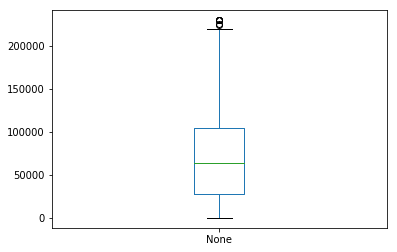

In [32]:
# setup threshold and remove large outliers 
q1,q3 = compensation_amount_usd.describe()[['25%', '75%']] # 25% and 75% value from describe()
threshold = q3 + (q3-q1)*1.5

# remove values larger than threshold
compensation_amount_usd2 = compensation_amount_usd.where( compensation_amount_usd < threshold )
compensation_amount_usd2.plot.box()

In [33]:
# Add new column 'CompensationAmountUSD' into 'res_df_top12' 
#print(res_df_top12.shape)
#print(compensation_amount_usd.shape)
res_df_with_usd = res_df_top12.copy()  # create copy from slice, and add new column
res_df_with_usd['CompensationAmountUSD'] = compensation_amount_usd2.values
res_df_with_usd.iloc[10:20, -3:]

,JobFactorDiversity,JobFactorPublishingOpportunity,CompensationAmountUSD
Country,,,
Brazil,Somewhat important,Somewhat important,NaN
United States,NaN,NaN,NaN
United Kingdom,NaN,NaN,NaN
United States,Very Important,Very Important,NaN
Brazil,Not important,Not important,NaN
United States,Somewhat important,Somewhat important,NaN
United States,NaN,NaN,20000.000
United States,NaN,NaN,100000.000
United States,NaN,NaN,NaN


## Categorical Data

In [34]:
# Extract columns whose name start in 'WorkToolsFrequency'
wt_freq_df = res_df_with_usd.loc[:,res_df_with_usd.columns.str.startswith('WorkToolsFrequency')].copy()
wt_freq_df.head()

,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss,WorkToolsFrequencyC,WorkToolsFrequencyCloudera,WorkToolsFrequencyDataRobot,WorkToolsFrequencyFlume,WorkToolsFrequencyGCP,WorkToolsFrequencyHadoop,WorkToolsFrequencyIBMCognos,...,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1,WorkToolsFrequencySelect2
Country,,,,,,,,,,,,,,,,,,,,,
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,Rarely,Often,NaN,NaN,Rarely,NaN,NaN,NaN,Rarely,NaN,...,NaN,Often,NaN,NaN,Rarely,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Often,NaN,NaN,NaN,Often,NaN,NaN,NaN,NaN
United States,NaN,NaN,NaN,Sometimes,Most of the time,NaN,NaN,NaN,Most of the time,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Most of the time,NaN,NaN


In [35]:
# Rename column names by removing "WorkToolsFrequency"
wt_freq_df.columns = wt_freq_df.columns.map( lambda x: x.replace('WorkToolsFrequency',''))
wt_freq_df.head()

,AmazonML,AWS,Angoss,C,Cloudera,DataRobot,Flume,GCP,Hadoop,IBMCognos,...,Spark,SQL,Stan,Statistica,Tableau,TensorFlow,TIBCO,Unix,Select1,Select2
Country,,,,,,,,,,,,,,,,,,,,,
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,Rarely,Often,NaN,NaN,Rarely,NaN,NaN,NaN,Rarely,NaN,...,NaN,Often,NaN,NaN,Rarely,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Often,NaN,NaN,NaN,Often,NaN,NaN,NaN,NaN
United States,NaN,NaN,NaN,Sometimes,Most of the time,NaN,NaN,NaN,Most of the time,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Most of the time,NaN,NaN


In [36]:
# by using 0th column, examine what kind of answers exist 
freqs = wt_freq_df.iloc[:,0].unique()
freqs

array([nan, 'Rarely', 'Sometimes', 'Often', 'Most of the time'],
      dtype=object)

In [37]:
# create new data frame to count per Working Tool type 
wt_freq_count_df = pd.DataFrame([], index=wt_freq_df.columns)
for freq in freqs[1:]: # skip NaN 
    wt_freq_count_df[freq] = (wt_freq_df == freq).sum()  # True = 1, False = 0 
    
wt_freq_count_df.head()

,Rarely,Sometimes,Often,Most of the time
AmazonML,112,96,52,17
AWS,247,368,382,394
Angoss,6,5,2,2
C,248,331,215,203
Cloudera,59,90,83,76


In [38]:
# Create total column 
wt_freq_count_df['total'] = wt_freq_count_df.sum(axis=1)
wt_freq_count_df.head()

,Rarely,Sometimes,Often,Most of the time,total
AmazonML,112,96,52,17,277
AWS,247,368,382,394,1391
Angoss,6,5,2,2,15
C,248,331,215,203,997
Cloudera,59,90,83,76,308


In [39]:
# in place sorting by total 
wt_freq_count_df.sort_values('total', ascending=False, inplace=True)

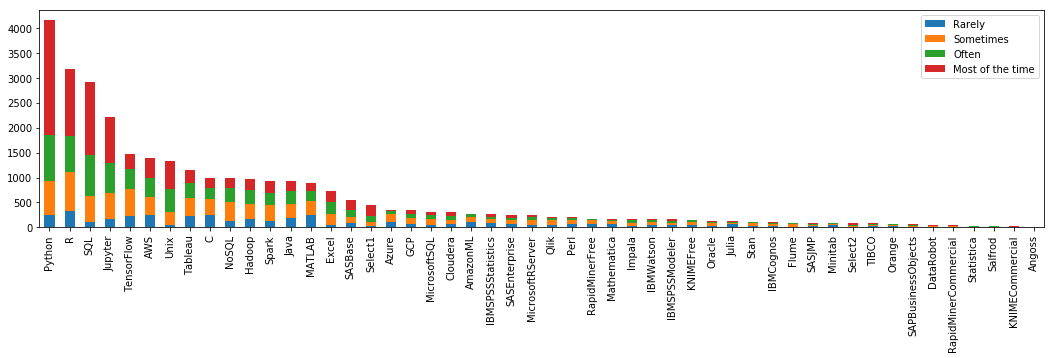

In [40]:
wt_freq_count_df.iloc[:,:-1].plot.bar(stacked=True, figsize=(18,4))  # do not plot 'total'

## Data Frame Manipulation  

Run these cells from this point downward. 

In [41]:
tools_salary_df = wt_freq_df.copy() # copy of original Working Tools data frame
tools_salary_df.head()

,AmazonML,AWS,Angoss,C,Cloudera,DataRobot,Flume,GCP,Hadoop,IBMCognos,...,Spark,SQL,Stan,Statistica,Tableau,TensorFlow,TIBCO,Unix,Select1,Select2
Country,,,,,,,,,,,,,,,,,,,,,
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,Rarely,Often,NaN,NaN,Rarely,NaN,NaN,NaN,Rarely,NaN,...,NaN,Often,NaN,NaN,Rarely,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Often,NaN,NaN,NaN,Often,NaN,NaN,NaN,NaN
United States,NaN,NaN,NaN,Sometimes,Most of the time,NaN,NaN,NaN,Most of the time,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Most of the time,NaN,NaN


In [42]:
# Answer = 'Most of the time' or 'Often' 
tools_salary_df = (tools_salary_df == 'Most of the time') | (tools_salary_df == 'Often')

In [43]:
tools_salary_df.head()

,AmazonML,AWS,Angoss,C,Cloudera,DataRobot,Flume,GCP,Hadoop,IBMCognos,...,Spark,SQL,Stan,Statistica,Tableau,TensorFlow,TIBCO,Unix,Select1,Select2
Country,,,,,,,,,,,,,,,,,,,,,
United States,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Canada,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
United States,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
Brazil,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
United States,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [44]:
# Into cells of 'True" (i.e., 'Most of the time' or 'Often'), copy the value from 'Compensation Amount USD'
# Note that both 'tools_salary_df' and 'res_df_with_usd' has same 'Country' index.  
for tool in tools_salary_df.columns:
    tools_salary_df[tool] = res_df_with_usd['CompensationAmountUSD'].where(tools_salary_df[tool]==True)

In [45]:
tools_salary_df.head(10)

,AmazonML,AWS,Angoss,C,Cloudera,DataRobot,Flume,GCP,Hadoop,IBMCognos,...,Spark,SQL,Stan,Statistica,Tableau,TensorFlow,TIBCO,Unix,Select1,Select2
Country,,,,,,,,,,,,,,,,,,,,,
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20882.4,NaN,NaN,NaN,NaN,NaN,20882.4,NaN,NaN
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
res_df_with_usd['CompensationAmountUSD'].head(10)

Country
United States        NaN
Canada               NaN
United States        NaN
Brazil               NaN
United States        NaN
India                NaN
Australia        64184.8
Russia           20882.4
Russia               NaN
India             1483.9
Name: CompensationAmountUSD, dtype: float64

In [47]:
# Median of salaries to each tool 
sort_by_median = tools_salary_df.median().sort_values(ascending=False).index

# top 5
sort_by_median[:5]

Index(['DataRobot', 'SASJMP', 'MicrosoftRServer', 'AWS', 'IBMSPSSModeler'], dtype='object')

In [48]:
# change column orders of origianl tools_salary_df
tools_salary_df_reorder = tools_salary_df.loc[:,sort_by_median]
tools_salary_df_reorder.head(10)

,DataRobot,SASJMP,MicrosoftRServer,AWS,IBMSPSSModeler,Spark,GCP,Stan,Perl,Select1,...,KNIMECommercial,TensorFlow,Qlik,Minitab,IBMSPSSStatistics,IBMCognos,Salfrod,Excel,RapidMinerFree,Statistica
Country,,,,,,,,,,,,,,,,,,,,,
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Salary of those who uses DataRobot most of the time, or often
tools_salary_df['DataRobot'].dropna().sort_values(ascending=False)

Country
United States    220000.0
United States    200000.0
United States    150000.0
United States    140000.0
United States    135000.0
United States    130000.0
United States    100000.0
Japan             91080.0
India             24992.0
Russia            23000.0
Name: DataRobot, dtype: float64